In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def plot_boxplot(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Extract the required columns for each algorithm
    reinforce_steps = data['Reinforce Steps']
    parallel_steps = data['Parallel Sweep Steps']

    # Box plot for Steps with median values
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[reinforce_steps, parallel_steps], showfliers=True, medianprops={"color": "black"})
    plt.xlabel('Algorithm')
    plt.ylabel('Steps')
    plt.title('Comparison of Steps between Reinforce and Parallel Sweep')
    plt.xticks([0, 1], ['Reinforce', 'Parallel Sweep'])

    # Add median value as text
    median_reinforce = reinforce_steps.median()
    median_parallel = parallel_steps.median()
    plt.text(0, median_reinforce, f'Median: {median_reinforce}', ha='center', va='bottom', fontweight='bold',
             color='black')
    plt.text(1, median_parallel, f'Median: {median_parallel}', ha='center', va='bottom', fontweight='bold',
             color='black')

    plt.show()

def plot_success_rate(config1_file, config2_file, config3_file):
    # Read the CSV files for each configuration
    config1_data = pd.read_csv(config1_file)
    config2_data = pd.read_csv(config2_file)
    config3_data = pd.read_csv(config3_file)

    # Get the success rates for each configuration
    config1_reinforce_found = config1_data['Reinforce Found']
    config1_parallel_sweep_found = config1_data['Parallel Sweep Found']
    config2_reinforce_found = config2_data['Reinforce Found']
    config2_parallel_sweep_found = config2_data['Parallel Sweep Found']
    config3_reinforce_found = config3_data['Reinforce Found']
    config3_parallel_sweep_found = config3_data['Parallel Sweep Found']

    # Calculate success rates for each configuration
    config1_reinforce_success_rate = config1_reinforce_found.mean() * 100
    config1_parallel_sweep_success_rate = config1_parallel_sweep_found.mean() * 100
    config2_reinforce_success_rate = config2_reinforce_found.mean() * 100
    config2_parallel_sweep_success_rate = config2_parallel_sweep_found.mean() * 100
    config3_reinforce_success_rate = config3_reinforce_found.mean() * 100
    config3_parallel_sweep_success_rate = config3_parallel_sweep_found.mean() * 100

    # Create a horizontal bar plot for success rates
    configurations = ['Configuration 1', 'Configuration 2', 'Configuration 3']
    reinforce_success_rates = [config1_reinforce_success_rate, config2_reinforce_success_rate,
                               config3_reinforce_success_rate]
    parallel_sweep_success_rates = [config1_parallel_sweep_success_rate, config2_parallel_sweep_success_rate,
                                    config3_parallel_sweep_success_rate]
    colors_reinforce = ['blue', 'blue', 'blue']
    colors_parallel_sweep = ['red', 'red', 'red']

    plt.figure(figsize=(8, 6))
    bar_width = 0.35
    index = np.arange(len(configurations))

    bars_reinforce = plt.barh(index, reinforce_success_rates, bar_width, color=colors_reinforce, label='Reinforce')
    bars_parallel_sweep = plt.barh(index + bar_width, parallel_sweep_success_rates, bar_width,
                                   color=colors_parallel_sweep, label='Parallel Sweep')

    # Add value labels to the bars
    for bar in bars_reinforce:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='left', va='center',
                 fontweight='bold', color='black')
    for bar in bars_parallel_sweep:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='left', va='center',
                 fontweight='bold', color='black')

    # Set y-axis ticks and labels
    plt.yticks(index + bar_width / 2, configurations)
    plt.ylabel('Configuration')

    # Set x-axis label and title
    plt.xlabel('Success Rate (%)')
    plt.title('Success Rate Comparison between Configurations')
    # Set the x-axis limits
    plt.xlim(0, max(max(reinforce_success_rates), max(parallel_sweep_success_rates)) * 1.1)

    # Add legend
    plt.legend()

    plt.show()

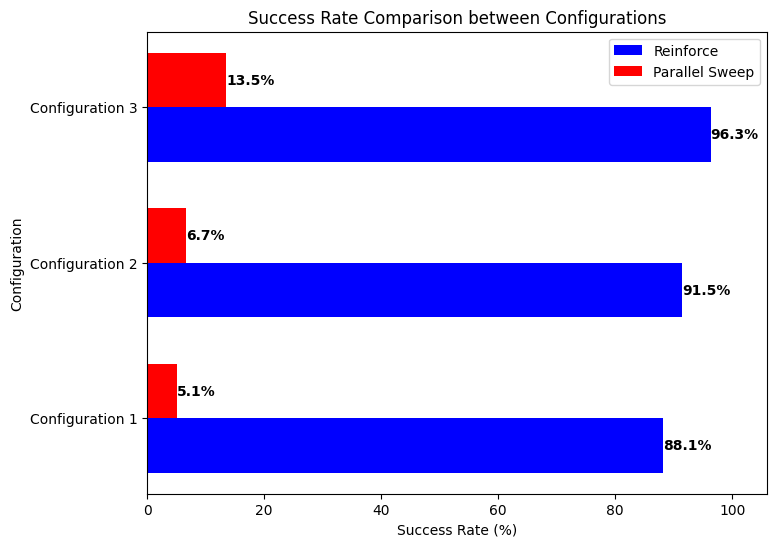

In [ ]:
plot_success_rate('results_20_20_1.csv', 'results_20_20_2.csv', 'results_20_20_4.csv')

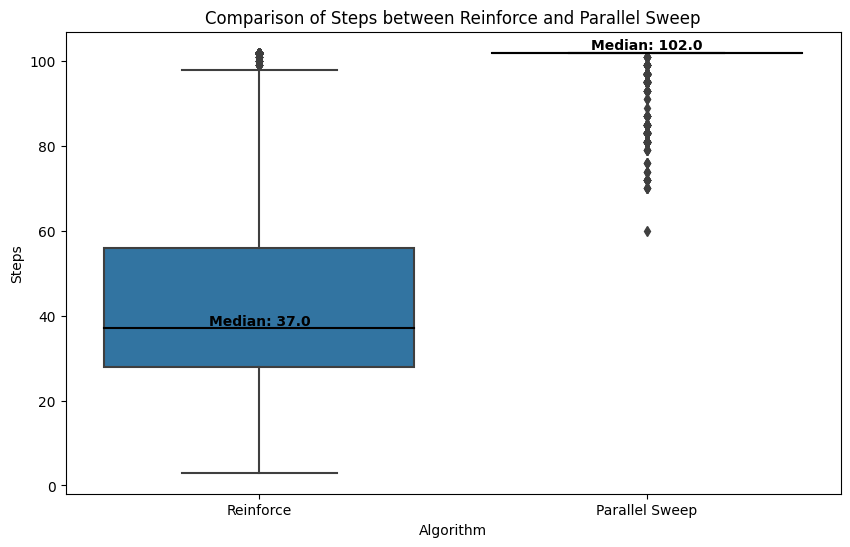

In [ ]:
plot_boxplot('results_20_20_1.csv')

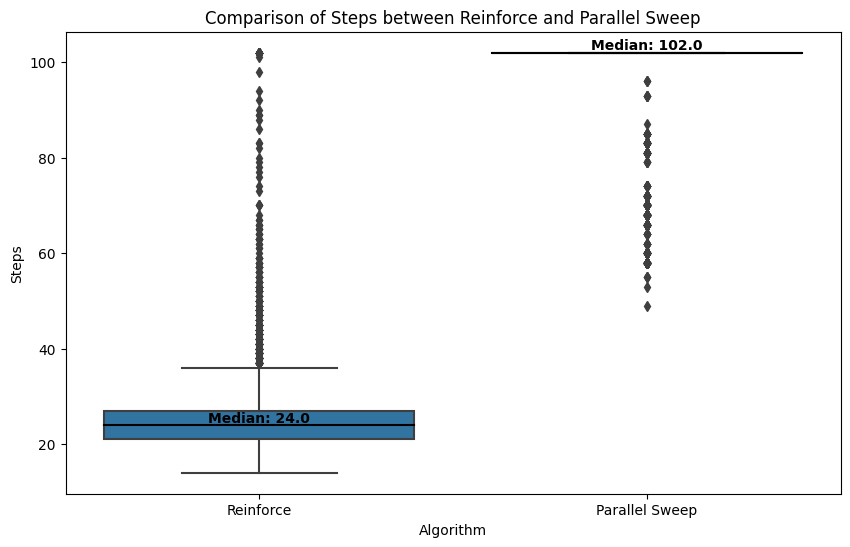

In [ ]:
plot_boxplot('results_20_20_2.csv')

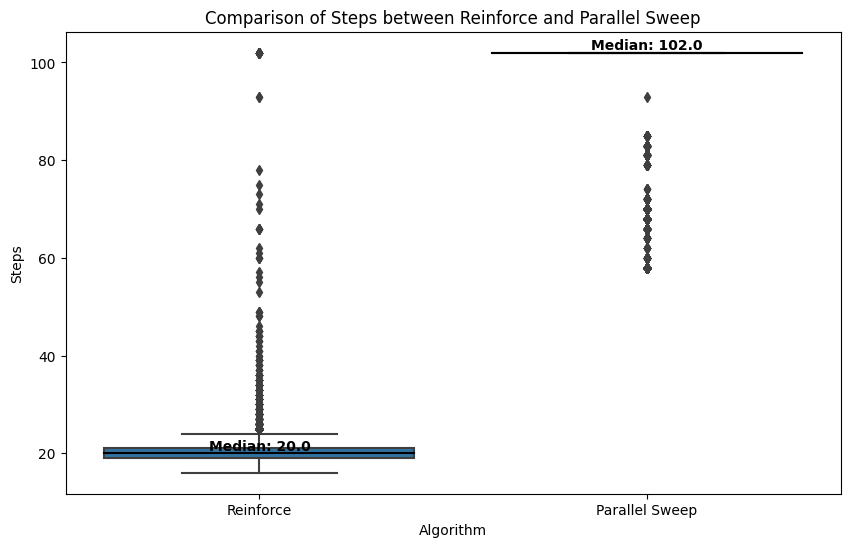

In [ ]:
plot_boxplot('results_20_20_4.csv')